## 1. Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from jcopml.pipeline import num_pipe, cat_pipe

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

# import warnings
# warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## 2. Import Dataset

In [2]:
# Reading and converting the data into a pandas dataframe
df = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

## 3. Exploratory Data Analysis

In [3]:
df = df.drop(columns=[
    'SEQN', 'Ratio_Family_Income_Poverty', 'Health_Insurance', 'Annual_Family_Income', 'Height', 'X60_sec_pulse', 
    'Lymphocyte', 'Monocyte', 'Eosinophils', 'Total_Cholesterol', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Hematocrit',
    'Segmented_Neutrophils'])

In [4]:
# Nama kolom yang ingin Anda cari indeksnya
columns_to_find =['Gender', 'Vigorous_work', 'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke']

# Mendapatkan indeks kolom
column_indices = [df.columns.get_loc(column) for column in columns_to_find]

print(column_indices)

[0, 32, 33, 34, 35, 36]


## 4. Pre-Processing

In [5]:
# Mengatur pandas agar menampilkan semua kolom
pd.set_option('display.max_columns', None)
df.describe()

,Gender,Age,Systolic,Diastolic,Weight,Body_Mass_Index,White_Blood_Cells,Basophils,Red_Blood_Cells,Hemoglobin,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,124.090078,69.919253,80.988276,28.824588,7.269524,0.700906,4.668632,14.139073,33.897452,253.012886,8.196637,13.082278,42.528116,70.789611,25.722511,25.601850,5.077399,78.632276,5.595013,29.459667,15.266181,132.045632,1.203049,11.801173,72.050158,321.723326,1.695405,2.863667,1.370344,5.676496,1.783840,1.598856,1.907333,1.549502,1.796165,0.040670
std,0.499830,18.010440,19.254741,13.575804,20.678734,6.608982,2.478754,0.474369,0.509368,1.541599,0.932481,67.403298,0.923022,1.304517,3.585254,26.073559,19.695625,25.889693,1.079629,39.157384,2.059786,43.576787,6.416872,31.961662,0.182223,5.276652,4.967992,86.129723,1.283654,0.953910,0.415985,1.050223,0.448324,0.511199,0.349674,0.497550,0.402853,0.197527
min,1.000000,20.000000,0.000000,0.000000,32.300000,13.180000,1.400000,0.000000,2.260000,5.800000,27.800000,4.000000,4.700000,9.700000,19.000000,7.000000,7.000000,4.000000,0.155000,17.700000,1.050000,3.000000,0.900000,4.000000,0.484000,0.000000,47.000000,23.800000,0.102000,-10.826000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,33.000000,111.000000,62.000000,66.500000,24.220000,5.700000,0.400000,4.320000,13.100000,33.300000,208.000000,7.600000,12.300000,40.000000,55.000000,19.000000,16.000000,4.319000,61.880000,4.718000,14.000000,10.900000,113.000000,1.098000,8.550000,69.000000,261.700000,0.903000,2.217500,1.070000,5.200000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,48.000000,121.000000,70.000000,78.200000,27.800000,6.900000,0.600000,4.660000,14.100000,33.861696,246.000000,8.100000,12.800000,43.000000,67.000000,23.000000,21.000000,4.991000,73.370000,5.110000,20.000000,14.500000,128.000000,1.195000,10.260000,72.000000,315.200000,1.344000,2.805000,1.290000,5.400000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,63.000000,134.000000,78.000000,92.100000,32.100000,8.400000,0.900000,5.010000,15.200000,34.500000,290.000000,8.800000,13.500000,45.000000,82.000000,27.000000,28.000000,5.740000,88.400000,5.662000,31.000000,18.800000,146.000000,1.324000,13.680000,75.000000,374.700000,2.066000,3.445250,1.600000,5.800000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,2.000000,85.000000,270.000000,132.000000,371.000000,130.210000,117.200000,13.900000,8.300000,19.700000,44.900000,1000.000000,15.100000,37.800000,57.000000,729.000000,1672.000000,1997.000000,14.611000,1573.520000,34.250000,2274.000000,99.800000,1539.000000,2.648000,224.010000,113.000000,1070.600000,34.559000,11.335000,5.840000,18.800000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000


### Outlier Detection and Removal:

In [6]:
# plt.figure(figsize=(100,20), facecolor='w')
# sns.boxplot(data=df)
# plt.show()

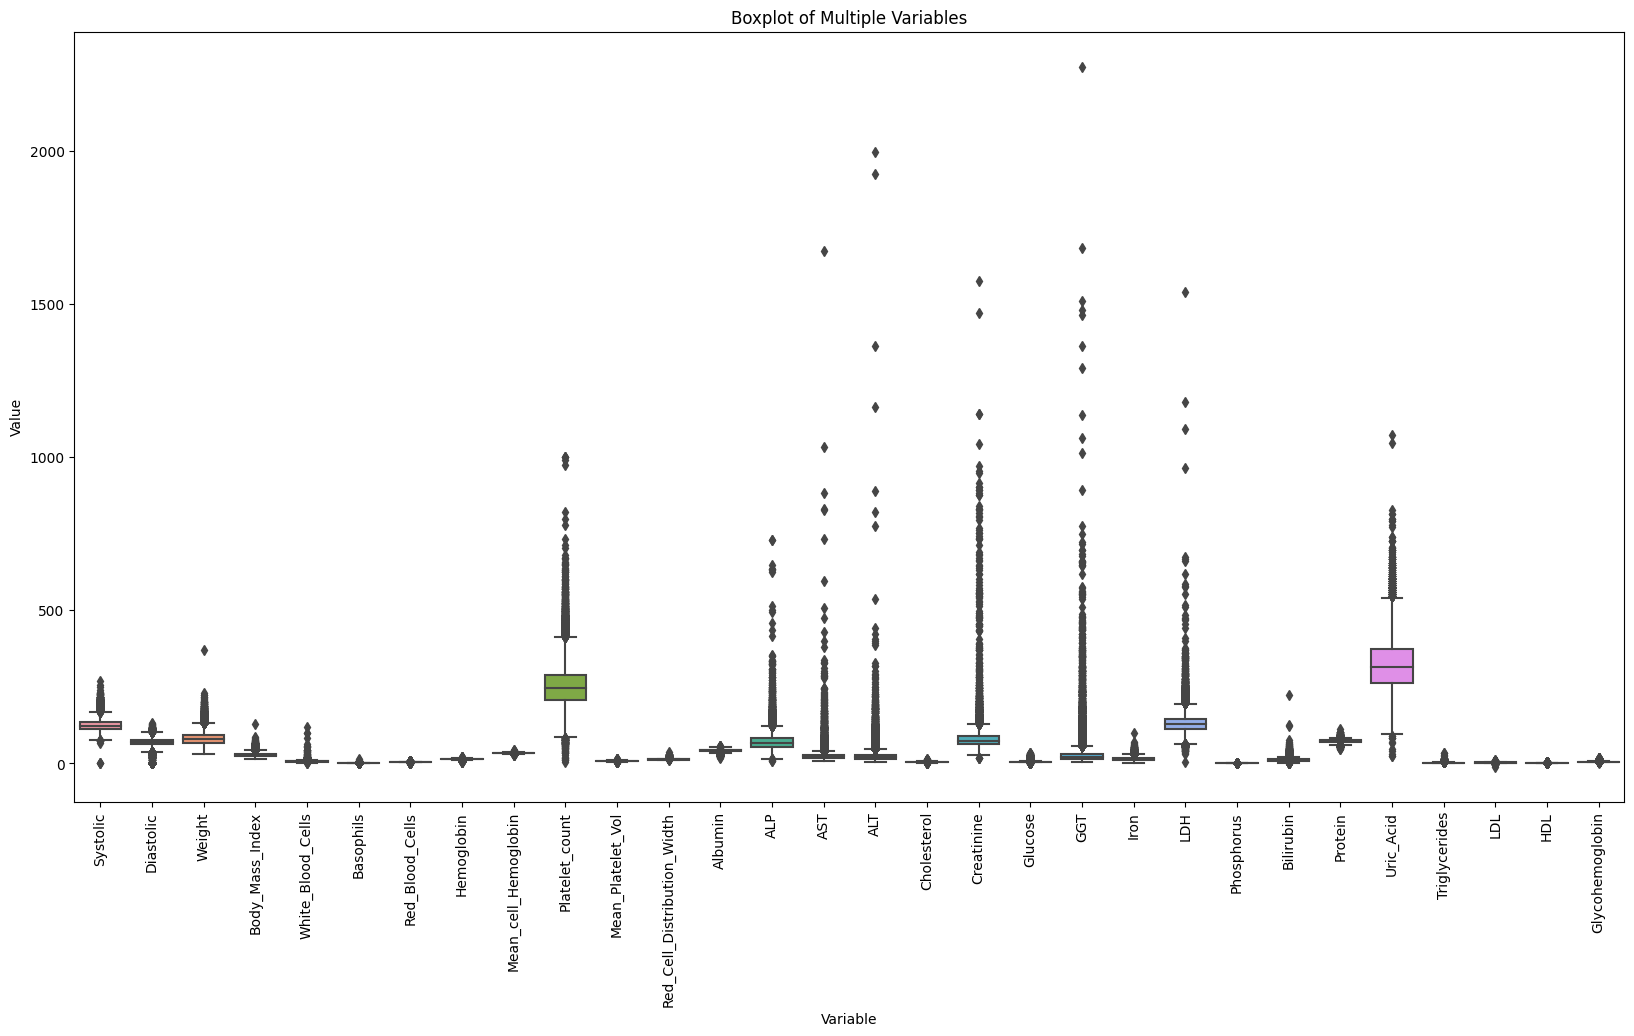

In [7]:
# List of variables to check for outliers
# num_variables = [
#     'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
#     'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
#     'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
#     'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
#     'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
#     'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
# ]

num_variables = [
#     'Age', 
    'Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'LDL', 'HDL', 'Glycohemoglobin'
]

# # Menggabungkan data untuk plot
melted_df = df[num_variables].melt(var_name='Variable', value_name='Value')

# # Visualisasi menggunakan boxplot dalam satu plot
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot of Multiple Variables')
plt.xticks(rotation=90)


# Visualize outliers using boxplot after replacing with mean
# plt.figure(figsize=(7, 70)) 
# for i, variable in enumerate(num_variables):
#     plt.subplot((len(num_variables) // 2) + 1, 2, i + 1)
#     sns.boxplot(y=df[variable])
#     plt.title(f'Boxplot of {variable}')
# plt.tight_layout()
plt.show()

In [8]:
# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[column].mean()
        
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Replace outliers with mean
df_clean = replace_outliers_with_mean(df, num_variables)

# Menampilkan data asli
print("Data Data Asli")
print(df)

# Menampilkan data setelah penghapusan outlier
print("\nData setelah replace dengan mean:")
print(df_clean)

Data Data Asli
       Gender  Age    Systolic  Diastolic  Weight  Body_Mass_Index  \
0           1   77   98.000000       56.0    75.4            24.90   
1           1   49  122.000000       83.0    92.5            29.10   
2           1   37  124.090078       99.0    99.2            30.62   
3           1   70  130.000000       66.0    63.6            25.57   
4           1   81  136.000000       61.0    75.5            27.33   
...       ...  ...         ...        ...     ...              ...   
37074       1   25  112.000000       76.0    39.2            21.00   
37075       2   76  112.000000       46.0    59.1            21.50   
37076       2   80  146.000000       58.0    71.7            31.00   
37077       1   35  106.000000       66.0    78.2            26.00   
37078       2   24  114.000000       68.0    58.3            21.40   

       White_Blood_Cells  Basophils  Red_Blood_Cells  Hemoglobin  \
0                    7.6        0.5             4.73        14.1   
1       

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29292\3717864279.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '124.09007794169206' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29292\3717864279.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.91925348580058' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29292\3717864279.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '42.52811564497424' has dt

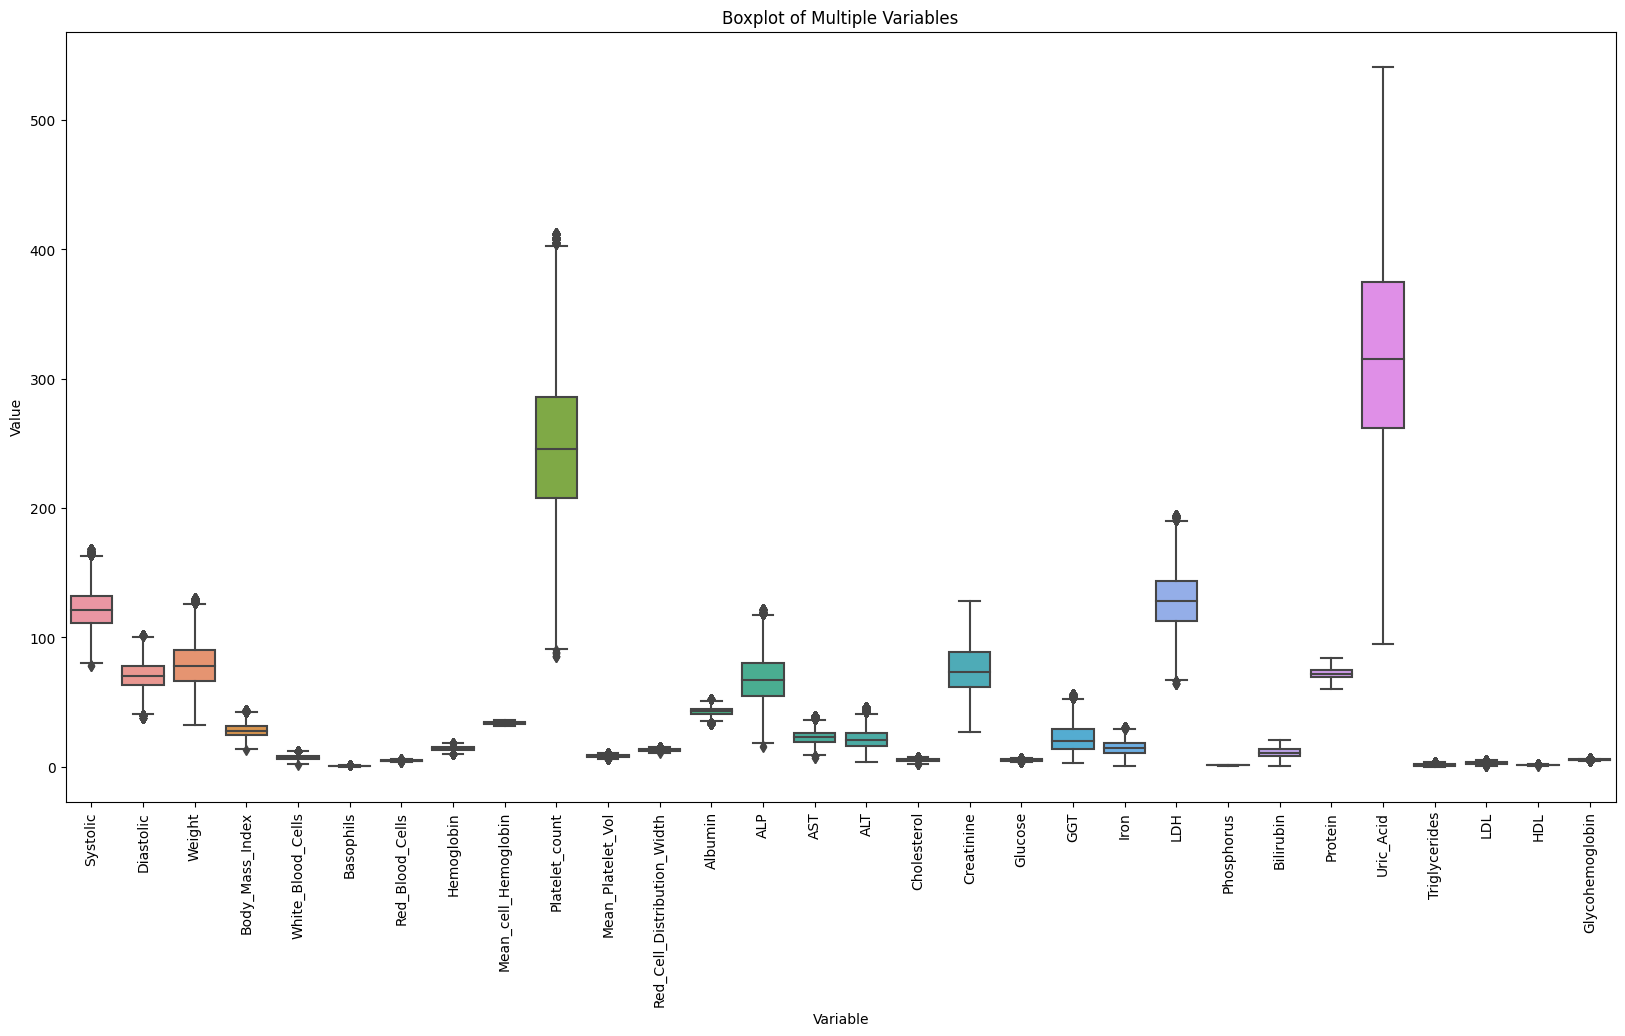

In [9]:
# List of variables to check for outliers
# num_variables = [
#     'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
#     'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
#     'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
#     'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
#     'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
#     'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
# ]

num_variables = [
#     'Age', 
    'Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'LDL', 'HDL', 'Glycohemoglobin'
]

# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df_clean, columns):
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
#         mean_value = df[column].mean()
#         df.loc[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound), column] = mean_value
        
        median_value = df[column].median()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    return df

# Menggabungkan data untuk plot
melted_df = df_clean[num_variables].melt(var_name='Variable', value_name='Value')

# # Visualisasi menggunakan boxplot dalam satu plot
plt.figure(figsize=(20, 10), facecolor='w')
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.title('Boxplot of Multiple Variables')
plt.xticks(rotation=90)

# Visualize outliers using boxplot after replacing with mean
# plt.figure(figsize=(7, 70)) 
# for i, variable in enumerate(num_variables):
#     plt.subplot((len(num_variables) // 2) + 1, 2, i + 1)
#     sns.boxplot(y=df_clean[variable])
#     plt.title(f'Boxplot of {variable}')
# plt.tight_layout()

plt.show()



## Menghitung korelasi

Features identified for removal: {'Hemoglobin', 'LDL', 'Body_Mass_Index'}
Remaining features after correlation thresholding: Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'White_Blood_Cells',
       'Basophils', 'Red_Blood_Cells', 'Mean_cell_Hemoglobin',
       'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid',
       'Triglycerides', 'HDL', 'Glycohemoglobin', 'Vigorous_work',
       'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke'],
      dtype='object')


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

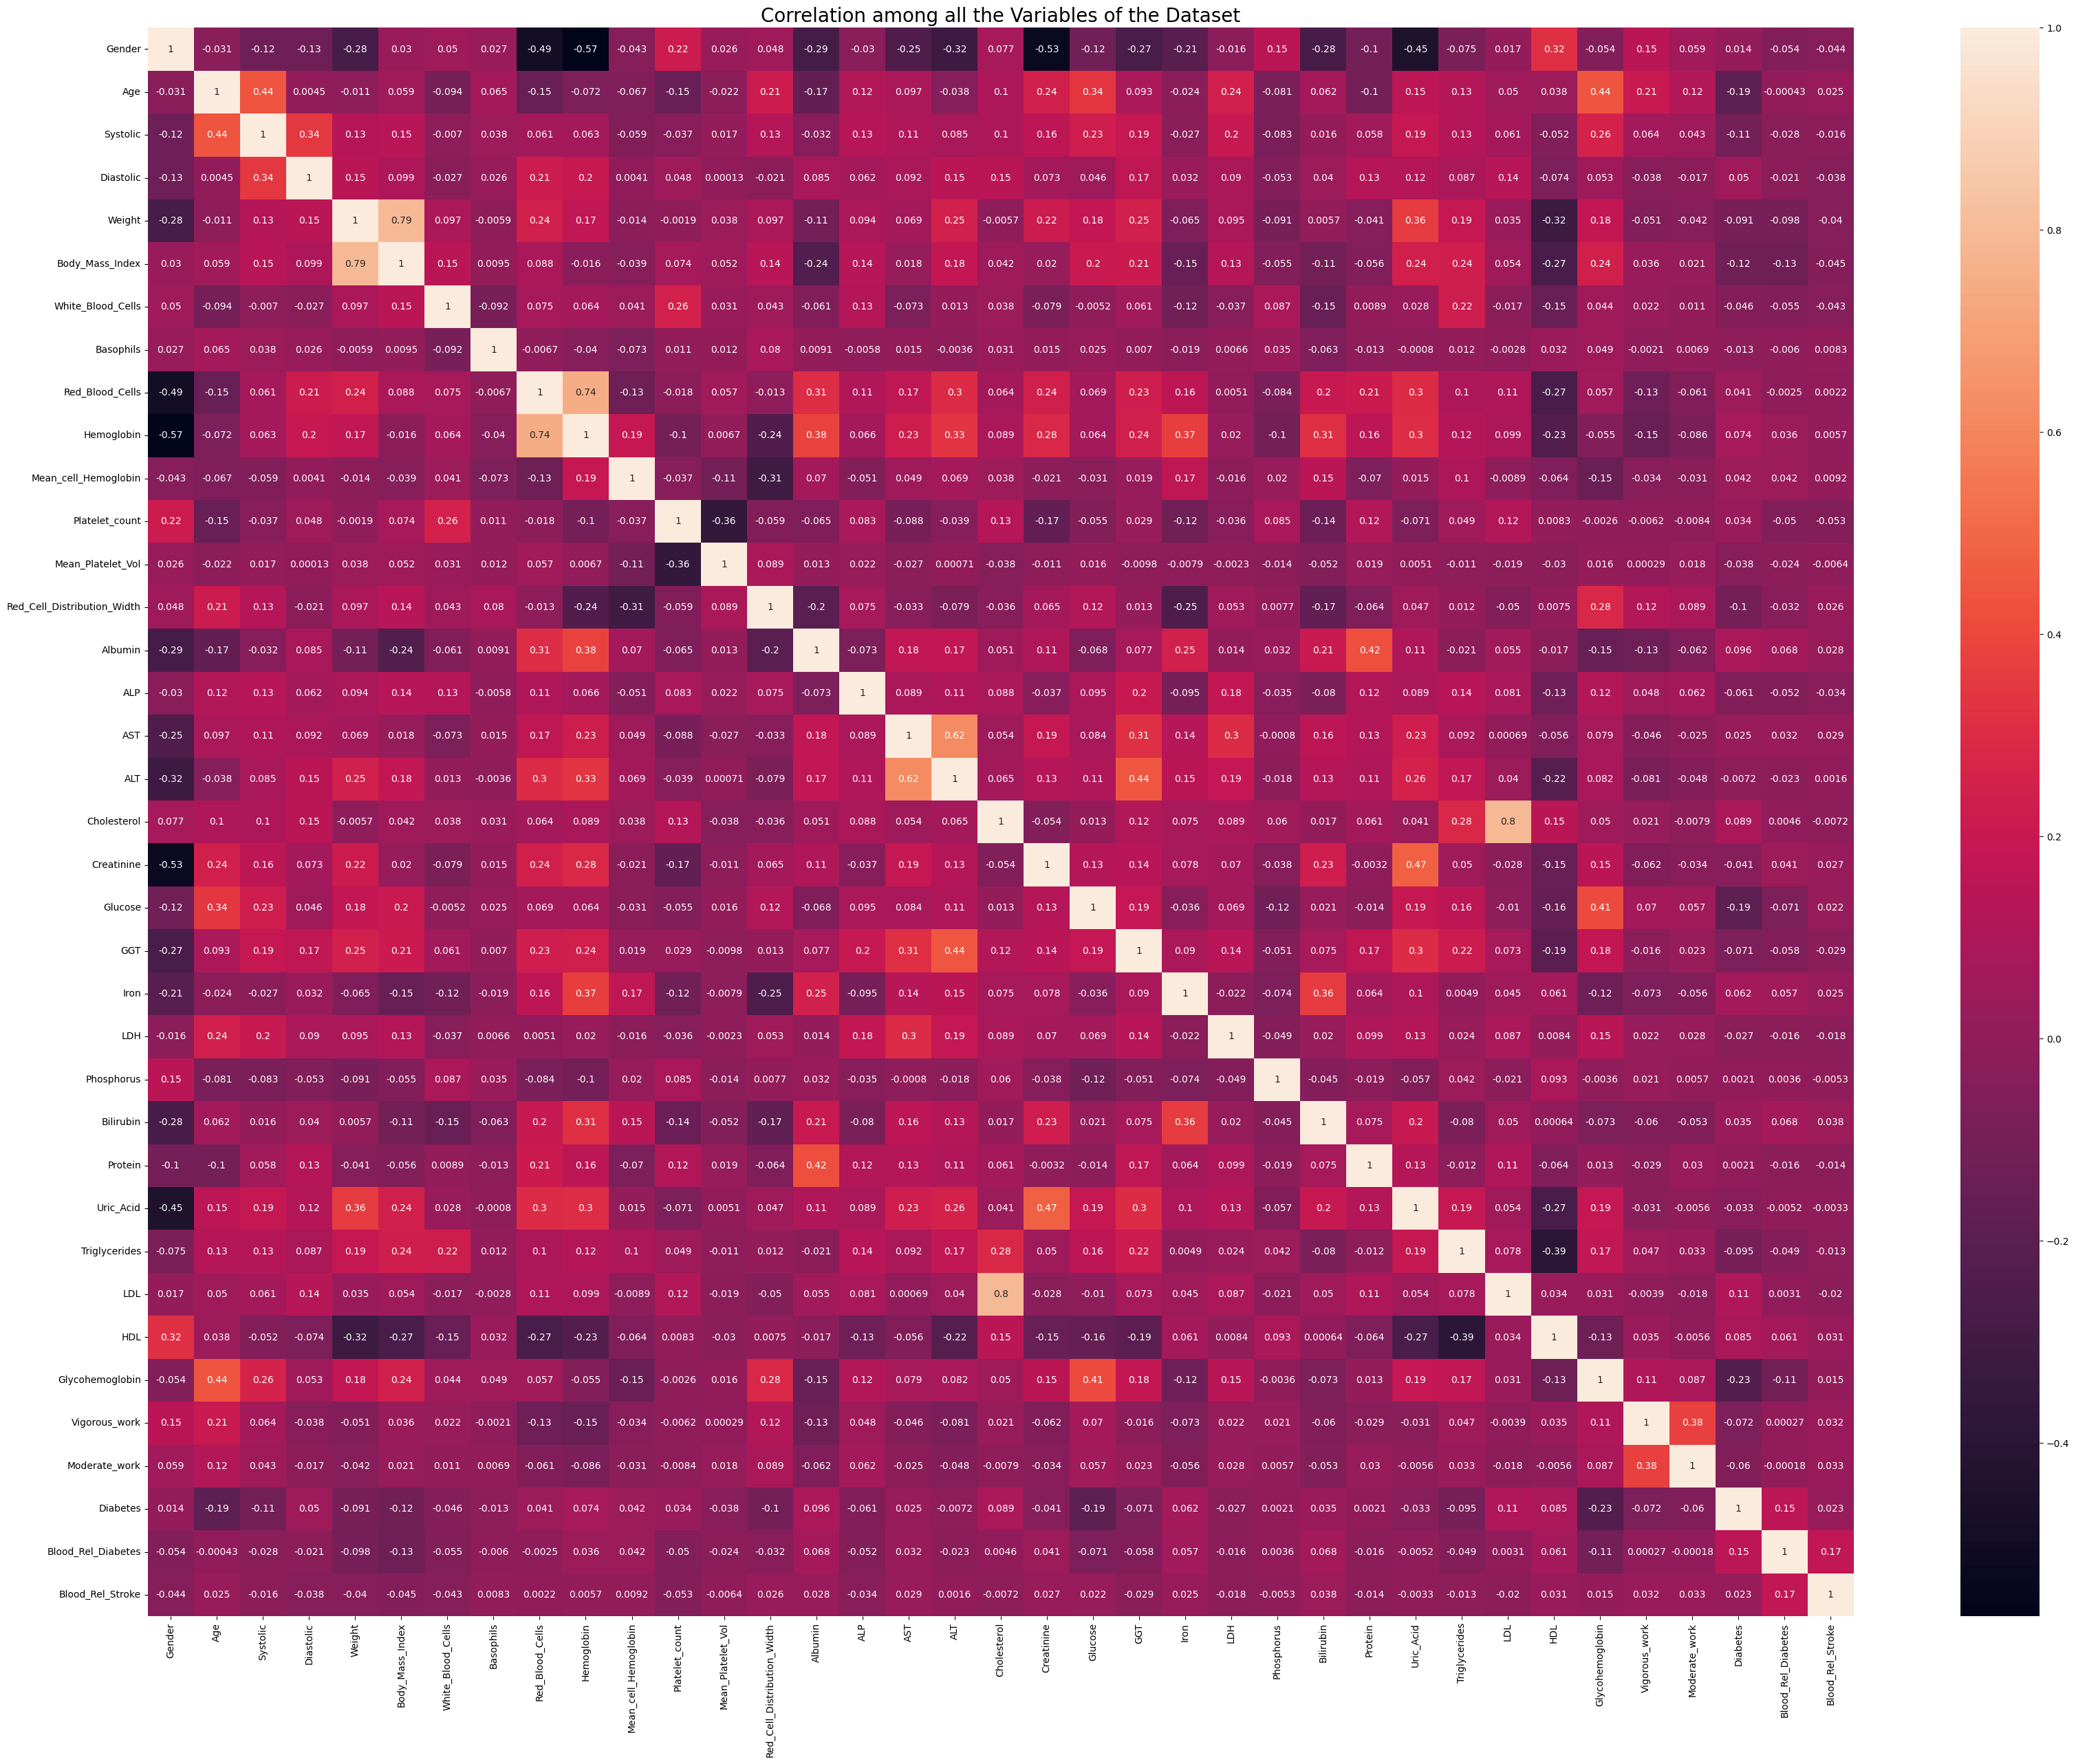

In [10]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target column for the correlation matrix
df_features = df.drop(columns='CoronaryHeartDisease')

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Set the correlation threshold
threshold = 0.7

# Identify features to drop based on the threshold
col_corr = set()  # Set of all the names of correlated columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Absolute value of the correlation coefficient
            colname = correlation_matrix.columns[i]  # Getting the name of the column
            col_corr.add(colname)

# Print the identified features for review
print(f"Features identified for removal: {col_corr}")

# Remove the highly correlated features
df_reduced = df_features.drop(columns=col_corr)

print(f"Remaining features after correlation thresholding: {df_reduced.columns}")

# Optionally, add the target variable back to the reduced dataframe
df_reduced['CoronaryHeartDisease'] = df['CoronaryHeartDisease']

#Checking relationship between variables
cor=df_features.corr()
plt.figure(figsize=(40,30), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

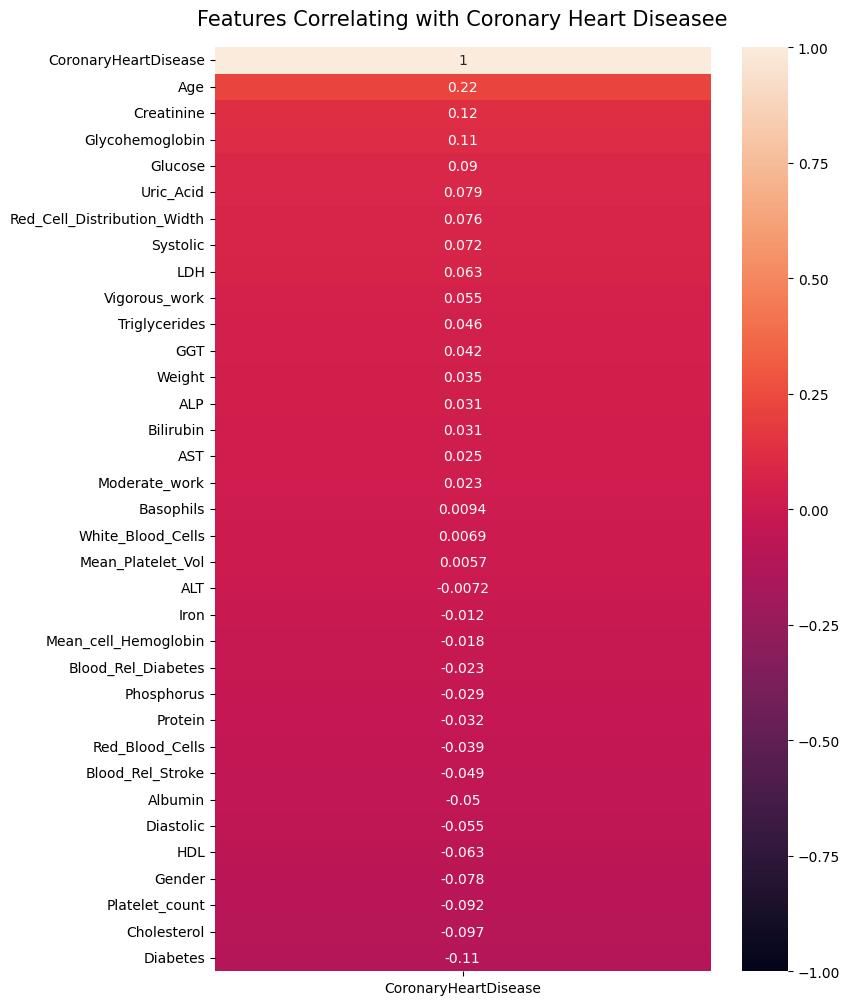

In [11]:
#  korelasi semua fitur dengan 'CoronaryHeartDisease', sebuah variabel dependen tunggal, yang diurutkan berdasarkan 'CoronaryHeartDisease' secara menurun.
df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Coronary Heart Diseasee', fontdict={'fontsize':15}, pad=16);

## Feature Splitting

In [12]:
X = df_reduced.drop(columns='CoronaryHeartDisease') #x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
y = df_reduced['CoronaryHeartDisease'] #y atribut label (dependent)

## Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [13]:
#SMOTE
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC

# Resampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan hasil resampling
print("Sebelum resampling, distribusi kelas pada training set:")
print(pd.Series(y).value_counts())
print("\nSetelah resampling, distribusi kelas pada training set:")
print(pd.Series(y_resampled).value_counts())
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')

print('\nBalance of positive and negative classes (%):')
y_resampled.value_counts(normalize=True) * 100

Sebelum resampling, distribusi kelas pada training set:
CoronaryHeartDisease
0    35571
1     1508
Name: count, dtype: int64

Setelah resampling, distribusi kelas pada training set:
CoronaryHeartDisease
0    35571
1    35571
Name: count, dtype: int64
Shape of X before SMOTE: (37079, 34)
Shape of X after SMOTE: (71142, 34)

Balance of positive and negative classes (%):


CoronaryHeartDisease
0    50.0
1    50.0
Name: proportion, dtype: float64

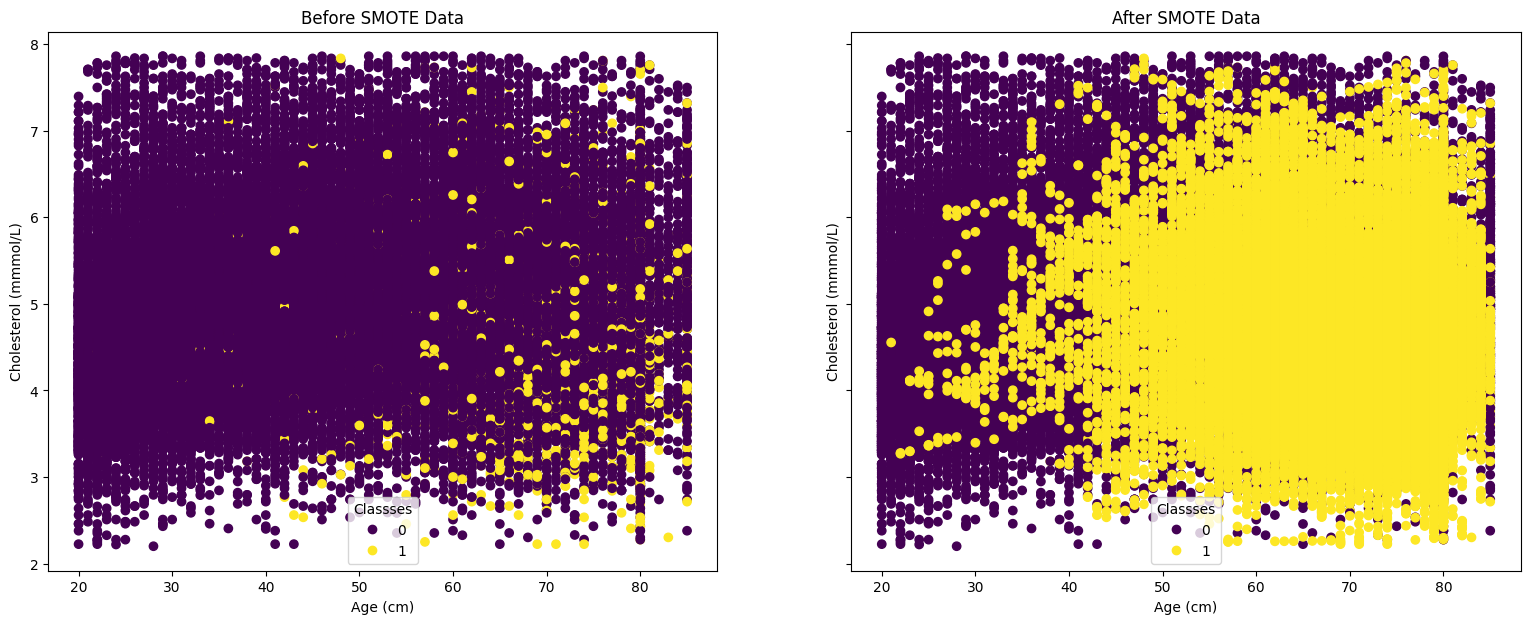

In [14]:
import matplotlib.pyplot as plt
fig,((ax0, ax1))=plt.subplots(nrows=1,ncols=2,figsize=(19,7),sharey=True );

scatter0 = ax0.scatter(x=X['Age'],
                       y=X['Cholesterol'],
                       c=y)

ax0.set(title= 'Before SMOTE Data',xlabel = 'Age (cm)' ,
       ylabel ='Cholesterol (mmmol/L)' )

ax0.legend(*scatter0.legend_elements(),title='Classses');

#----------------------------------------------------------------

scatter1 = ax1.scatter(x=X_resampled['Age'],
                       y=X_resampled['Cholesterol'],
                       c=y_resampled)

ax1.set(title= 'After SMOTE Data',xlabel = 'Age (cm)' ,
       ylabel ='Cholesterol (mmmol/L)' )

ax1.legend(*scatter1.legend_elements(),title='Classses');

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.2, 
                                                    stratify = y_resampled, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
                                                    random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56913, 34), (14229, 34), (56913,), (14229,))

In [16]:
y_train.value_counts()

CoronaryHeartDisease
1    28457
0    28456
Name: count, dtype: int64

In [17]:
!pip install graphviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import numpy as np

# Ficticuous data
np.random.seed(0)
X = np.random.normal(0,1,(1000, 3))
y = X[:,0]+X[:,1]*X[:,2] > 0

# Classifier
clf = GradientBoostingClassifier(max_depth=3, random_state=0)
clf.fit(X[:600], y[:600])

# Get the tree number 42
sub_tree_42 = clf.estimators_[42, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('./out.png').write_bytes(png)
# Display
Image(png)

InvocationException: GraphViz's executables not found

## Training to get the hyperparameter

In [ ]:
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import bayes_search_params as bsp

from jcopml.tuning.space import Integer, Real
from skopt.space import Categorical

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Misalnya kita punya dataset X_resampled (fitur), y_resampled (target) dan X_test
# X_resampled, y_resampled = load_your_data()
# X_test = load_your_test_data()

# Feature selection menggunakan SelectKBest
k = 30  # Memilih 10 fitur terbaik
selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Mendapatkan skor dari semua fitur
scores = selector.scores_

# Mendapatkan indeks dari fitur yang terpilih
selected_features_indices = selector.get_support(indices=True)

# Mendapatkan skor dari fitur yang terpilih
selected_scores = scores[selected_features_indices]

# Membuat DataFrame untuk memudahkan interpretasi
feature_scores = pd.DataFrame({
    'Feature': X_resampled.columns[selected_features_indices],
    'Score': selected_scores
})

# Menampilkan skor fitur yang terpilih
print(feature_scores.sort_values(by='Score', ascending=False))

pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
pip install jupyter_nbextensions_configurator
jupyter nbextensions_configurator enable --user

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import random
import time
import matplotlib.pyplot as plt

# Load dataset di awal agar bisa digunakan berulang kali
data = load_iris()
X_train_selected, X_test_selected, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Fungsi objektif untuk optimasi akurasi model Gradient Boosting
def objective_function(params):
    # Memecah hyperparameter dari params
    n_estimators = int(params[0])
    learning_rate = params[1]
    max_depth = int(params[2])
    subsample = params[3]
    max_features = params[4]
    
    # Melatih model dengan hyperparameter yang diberikan
    model = GradientBoostingClassifier(
        n_estimators=n_estimators, 
        learning_rate=learning_rate, 
        max_depth=max_depth, 
        subsample=subsample, 
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train_selected, y_train)
    
    # Menghitung akurasi pada data uji
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Karena kita ingin memaksimalkan akurasi, kita kembalikan negatif dari akurasi
    # agar Bayesian Optimization bisa meminimalkan nilai fungsi objektif.
    return -accuracy

# Fungsi untuk menghitung EI (Expected Improvement)
def expected_improvement(mu, sigma, y_best, xi=0.01):
    z = (mu - y_best - xi) / sigma
    return (mu - y_best - xi) * norm.cdf(z) + sigma * norm.pdf(z)

# Fungsi untuk surrogate model TPE
def surrogate_tpe(x, y, x_new):
    n = len(x)
    x_numeric = np.array([xi[:4] for xi in x])  # 4 kolom pertama adalah numerik
    x_categorical = np.array([xi[4] for xi in x])  # kolom terakhir adalah kategorikal
    
    # Sort x dan y berdasarkan nilai y
    idx = np.argsort(y)
    x_numeric = x_numeric[idx]
    x_categorical = x_categorical[idx]
    y = np.array(y)[idx]
    
    # Tentukan quantile threshold
    q = 0.3
    n_below = int(q * n)
    
    # Split menjadi l(x) dan g(x)
    x_numeric_l = x_numeric[:n_below]
    x_numeric_g = x_numeric[n_below:]
    x_categorical_l = x_categorical[:n_below]
    y_l = y[:n_below]
    y_g = y[n_below:]
    
    # Model l(x) menggunakan KDE Gaussian
    mu_l = np.mean(x_numeric_l, axis=0)
    sigma_l = np.std(x_numeric_l, axis=0)
    
    # Model g(x) menggunakan KDE Gaussian
    mu_g = np.mean(x_numeric_g, axis=0)
    sigma_g = np.std(x_numeric_g, axis=0)
    
    # Menghitung likelihood ratio untuk setiap kandidat baru (bagian numerik)
    x_numeric_new = x_new[:4]
    l_x_new_numeric = np.prod(norm.pdf(x_numeric_new, mu_l, sigma_l))
    g_x_new_numeric = np.prod(norm.pdf(x_numeric_new, mu_g, sigma_g))
    
    # Menghitung EI untuk x_new numerik
    ei_numeric = expected_improvement(l_x_new_numeric / (l_x_new_numeric + g_x_new_numeric), sigma_l.mean(), min(y))
    
    # Menangani bagian kategorikal
    x_categorical_new = x_new[4]
    if (x_categorical_new in x_categorical_l):
        categorical_weight = 0.75
    else:
        categorical_weight = 0.25
    
    # Total EI adalah kombinasi dari numerik dan kategorikal
    ei = ei_numeric * categorical_weight
    
    return ei

# Fungsi utama untuk Bayesian Optimization menggunakan TPE
def bayesian_optimization_tpe(objective_function, n_iter=20):
    # Inisialisasi history x dan y
    x_history = []
    y_history = []
    
    # Waktu mulai
    start_time = time.time()
    
    # Random sampling untuk iterasi pertama
    for _ in range(5):
        n_estimators = random.randint(50, 500)
        learning_rate = 10**random.uniform(-4, -0.52)  # log-uniform sampling
        max_depth = random.randint(3, 9)
        subsample = random.uniform(0.5, 1.0)
        max_features = random.choice(['auto', 'sqrt', 'log2'])
        params = [n_estimators, learning_rate, max_depth, subsample, max_features]
        y = objective_function(params)
        x_history.append(params)
        y_history.append(y)
    
    # Iterasi Bayesian Optimization
    for i in range(n_iter):
        # Generate kandidat baru
        candidate_n_estimators = np.linspace(50, 500, 50)
        candidate_learning_rate = np.logspace(-4, -0.52, 50)
        candidate_max_depth = np.arange(3, 10, 1)
        candidate_subsample = np.linspace(0.5, 1.0, 50)
        candidate_max_features = ['auto', 'sqrt', 'log2']
        
        ei_candidates = []
        
        # Hitung EI untuk setiap kandidat
        for n_est in candidate_n_estimators:
            for lr in candidate_learning_rate:
                for depth in candidate_max_depth:
                    for subsample in candidate_subsample:
                        for features in candidate_max_features:
                            params_new = [n_est, lr, depth, subsample, features]
                            ei = surrogate_tpe(x_history, y_history, params_new)
                            ei_candidates.append((ei, params_new))
        
        # Pilih params dengan EI tertinggi
        best_ei, best_params = max(ei_candidates, key=lambda item: item[0])
        y_new = objective_function(best_params)
        
        # Simpan history
        x_history.append(best_params)
        y_history.append(y_new)
        
        print(f"Iteration {i+1}: Params = {best_params}, accuracy = {-y_new}")
    
    # Waktu selesai
    end_time = time.time()
    
    # Output hasil terbaik
    best_idx = np.argmin(y_history)
    best_params = x_history[best_idx]
    best_accuracy = -y_history[best_idx]
    
    print(f"Best solution: Params = {best_params}, accuracy = {best_accuracy}")
    print(f"Total Computation Time: {end_time - start_time} seconds")
    
    # Visualisasi akurasi
    iterations = list(range(1, n_iter + 6))  # +5 for initial random sampling
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, [-acc for acc in y_history], marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Iterations')
    plt.grid(True)
    plt.show()
    
    # Visualisasi hyperparameter terhadap akurasi
    for i, label in enumerate(['n_estimators', 'learning_rate', 'max_depth', 'subsample', 'max_features']):
        plt.figure(figsize=(10, 6))
        if label == 'max_features':
            plt.scatter([x[i] for x in x_history], [-y for y in y_history], c='blue')
        else:
            plt.plot([x[i] for x in x_history], [-y for y in y_history], marker='o')
        plt.xlabel(label)
        plt.ylabel('Accuracy')
        plt.title(f'{label.capitalize()} vs Accuracy')
        plt.grid(True)
        plt.show()

    return best_params, best_accuracy

# Eksekusi Bayesian Optimization dengan TPE
bayesian_optimization_tpe(objective_function)


grafik menunjukkan bagaimana akurasi berubah seiring dengan meningkatnya jumlah pohon

In [ ]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
# gb_acc_score = accuracy_score(y_test, y_pred)

#confussion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.savefig('confussion matrix', dpi=350, bbox_inches='tight')
plt.show()

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",accuracy*100,'\n')
print(classification_report(y_test,y_pred))


# Menghitung nilai Precision, Recall, dan F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mendapatkan probabilitas prediksi
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_score:.4f}')

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve', dpi=350, bbox_inches='tight')
plt.show()

## Training model with balanced class and feature selection applied 

First of all let's import some useful functions from the hyperopt:

- fmin - the main function for us, it will minimize our functional
- tpe - optimization approaches
- hp - include different distributions of variables
- Trials - is used for logging

In [ ]:
from hyperopt import fmin, tpe, rand, Trials, hp

The interface of hyperop.fmin differs from Grid or Randomized search. First of all we need to create a function to minimize.

In [ ]:
import time
# define an objective function
def objective(params, random_state=42, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), X=X_train_selected, y=y_train):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': float(params['learning_rate']),
        'max_depth': int(params['max_depth']),
        'subsample': float(params['subsample']),
        'max_features': params['max_features'] 
    }

    # we use this params to create a new GBM Classifier
    clf = GradientBoostingClassifier(random_state=42, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(clf, 
                             X_train_selected, 
                             y_train, 
                             cv=cv, 
                             scoring="accuracy", 
                             n_jobs=-1).mean()

    # Mengembalikan dua metrik: skor akurasi dan waktu komputasi
    return {
        'loss': -score,  # HyperOpt meminimalkan, jadi kita ambil negatif akurasi untuk maksimalkan akurasi
        'status': STATUS_OK,
        'accuracy': score
#         'computation_time': computation_time
    }

We are finally prepared - we have a function gb_mse_cv(), that we will minimize varying parameters: 'learning_rate', 'max_depth', 'n_estimators'. Let's start with the TPE algorithm.

### Tree-structured Parzen Estimator

TPE is a default algorithm for the Hyperopt. It uses Bayesian approach for optimization. At every step it is trying to build probabilistic model of the function and choose the most promising parameters for the next step. Generally this types of algorithms works like this:

1. Generate random initial point ${x^*}$
2. Calculate ${F(x^*)}$
3. Using the history of trials try to build the conditional probability model $P(F | x)$
4. Choose ${x_i}$ that according to the $P(F | x)$ will most probably result in better ${F(x_i)}$
5. Compute the real value of the ${F(x_i)}$
6. Repeat steps 3-5 until one of the stop criteria is satisfied, for example i > max_eval

More information about particular TPE algorithm you can find, for example, here [https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f ] or in other articles. But it is beyond the scope of this tutorial.

Let's go to practice.

Using of fmin is very simple. We just need to define the possible space of our parameters and call the function.

In [ ]:
# Define the search space
space = {
#     'n_estimators': hp.quniform('n_estimators', 50, 500, 1), # Dari 50 hingga 500 dengan langkah 1, berarti ada 451 nilai (500 - 50 + 1).
#     'max_depth': hp.quniform('max_depth', 1, 10, 1), # Dari 1 hingga 10 dengan langkah 1, berarti ada 10 nilai (10 - 1 + 1).
#     'max_leaf_nodes': hp.quniform('max_leaf_nodes', 2, 10, 1), # Dari 2 hingga 10 dengan langkah 1, berarti ada 9 nilai (10 - 2 + 1).
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 25, 1), # Dari 1 hingga 25 dengan langkah 1, berarti ada 25 nilai (25 - 1 + 1)  
#     'learning_rate': hp.loguniform('learning_rate', -5, 0), # Karena ini adalah distribusi kontinyu, jumlah nilai unik yang bisa diambil adalah tidak terbatas,
#     'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
#     'subsample': hp.uniform('subsample', 0.5, 1.0)
    
    "n_estimators": hp.quniform("n_estimators", 50, 500, 1),
    "learning_rate": hp.loguniform("learning_rate", -4, 0.3),
    "max_depth": hp.quniform("max_depth", 3, 9, 1),
    "subsample": hp.uniform("subsample", 0.5, 1.0),
    "max_features": hp.choice("max_features", ["auto", "sqrt", "log2"])
}

# Custom function to display TPE process
def tpe_debugging(trials):
    for i, trial in enumerate(trials.trials):
        accuracy = -trial['result']['loss']  # Extract accuracy
        print(f"Iteration {i+1}")
        print(f"  Accuracy: {accuracy}")
        print(f"  Hyperparameters: {trial['misc']['vals']}")
        print("  ---")

# Function to run optimization with a given algorithm
def run_optimization(algo, algo_name, max_evals=100):
    # Inisialisasi objek Trials
    trials = Trials()
    
    # Initialize history of hyperparameters
    history = {}
    
    # Custom function to update history
    def update_history(trials):
        for trial in trials:
            vals = tuple((k, tuple(v)) for k, v in trial['misc']['vals'].items())
            history[vals] = trial['result']['loss']
    start_time = time.time()
    
    #fmin menjalankan optimasi menggunakan algoritma TPE, mencari kombinasi hyperparameter yang meminimalkan loss dan computation_time.
    best = fmin(
        fn=objective,
        space=space,
        algo=algo,
        max_evals=max_evals,
        trials=trials
    )
    
    # Update history with the results from trials
    update_history(trials.trials)
    end_time = time.time()
    computation_time = end_time - start_time
    
    print(f'{algo_name} - Best parameters: {best}')
    print(f'{algo_name} - Computation time: {computation_time:.2f} seconds')
    
    # Display the TPE process
    tpe_debugging(trials)
    
    model = GradientBoostingClassifier(random_state=42, 
                                       n_estimators=int(best['n_estimators']),
                                       learning_rate=best['learning_rate'],
                                       max_depth=int(best['max_depth']),
                                       subsample=best['subsample'],
                                       max_features=best['max_features']
                                      )
    model.fit(X_train_selected, y_train)
    training_accuracy = model.score(X_train_selected, y_train)
    print(f'{algo_name} - Training Accuracy: {training_accuracy:.4f}')

    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{algo_name} - Test Accuracy: {accuracy:.4f}')
    print('---------------------------------------------------------------------------')
    
    # Print the history of hyperparameters and scores
    for params, score in history.items():
        print("Params: {}, Score: {}".format(params, score))

# Run optimization with different algorithms
# run_optimization(rand.suggest, "Random Search")
run_optimization(tpe.suggest, "Tree-structured Parzen Estimator")
# run_optimization(tpe.suggest, "Tree-structured Parzen Estimator")

We have managed to find even better solution comparing to the RandomizedSearch.
Let's look at the visualization of the process

In [ ]:
# Mengonversi hasil ke dalam DataFrame
tpe_results = np.array([
    [
        x['result']['loss'],
        x['misc']['vals']['n_estimators'][0],
        x['misc']['vals']['max_depth'][0],
        x['misc']['vals']['max_leaf_nodes'][0],
        x['misc']['vals']['min_samples_leaf'][0],
        x['misc']['vals']['learning_rate'][0],
        x['misc']['vals']['min_samples_split'][0],
        x['misc']['vals']['min_samples_split'][0]
    ] for x in trials.trials
])

tpe_results_df = pd.DataFrame(tpe_results, columns=[
    'score', 
    'n_estimators',
    'max_depth', 
    'max_leaf_nodes', 
    'min_samples_leaf', 
    'learning_rate', 
    'min_samples_split',
    'min_samples_split'
])

# Plot hasil
fig, axes = plt.subplots(len(tpe_results_df.columns) - 1, 1, figsize=(10, 20), sharex=True)
for i, col in enumerate(tpe_results_df.columns[1:]):
    sns.lineplot(data=tpe_results_df, x=tpe_results_df.index, y=col, ax=axes[i])
    axes[i].set_title(f'Hyperparameter: {col}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# Plot skor (loss)
plt.figure(figsize=(10, 6))
sns.lineplot(data=tpe_results_df, x=tpe_results_df.index, y='score')
plt.title('Score (Loss) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Score (Loss)')
plt.show()

We can see that the movement of the parameters are quite random but the results become better with time: there are no extremely bad scores after 25 iterations but the number of good solutions increases. Algorithm started to predict quite good solutions, using information from the previous steps.

In [ ]:
import time
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the hyperparameter space
space  = [
    Integer(50, 500, name='n_estimators'),
    Integer(1, 10, name='max_depth'),
    Integer(2, 10, name='max_leaf_nodes'),
    Integer(1, 25, name='min_samples_leaf'),
    Real(0.01, 1, "log-uniform", name='learning_rate'),
    Integer(2, 10, name='min_samples_split'),
    Real(0.5, 1, name='subsample')
]

# Define the objective function
@use_named_args(space)
def objective(**params):
    clf_gp = GradientBoostingClassifier(random_state=42, **params)
    score = cross_val_score(clf_gp, X_train_selected, y_train, cv=StratifiedKFold(n_splits=3), scoring='accuracy').mean()
    return -score

start_time = time.time()

res_gp = gp_minimize(objective, space, n_calls=10, random_state=42)

end_time = time.time()
computation_time = end_time - start_time

best_params = {dim.name: val for dim, val in zip(space, res_gp.x)}
print("Best parameters: ", best_params)
print('Computation time: {:.2f} seconds'.format(computation_time))

model_2 = GradientBoostingClassifier(random_state=42, **best_params)

model_2.fit(X_train_selected, y_train)
training_accuracy = model_2.score(X_train_selected, y_train)
print(f'Training Accuracy: {training_accuracy:.2f}')

y_pred = model_2.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

In [ ]:
gb_conf_matrix = confusion_matrix(y_test, y_pred)
gb_acc_score = accuracy_score(y_test, y_pred)

#confussion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.savefig('confussion matrix', dpi=350, bbox_inches='tight')
plt.show()

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",accuracy*100,'\n')
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mendapatkan probabilitas prediksi
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC Score
auc_score = roc_auc_score(y_test, y_prob)

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('AUC-ROC Curve', dpi=350, bbox_inches='tight')
plt.show()

In [ ]:
# Function to plot hyperopt results
def plot_hyperopt_results(trials, n_trials, position):
    plt.subplot(3, 1, position)
    plt.title(f'Hyperopt - {n_trials} trials')
    plt.xlabel('n_estimators')
    plt.ylabel('learning_rate')

    hyperopt_params = np.array([
        (trial['misc']['vals']['n_estimators'][0], trial['misc']['vals']['learning_rate'][0])
        for trial in trials.trials
    ])
    hyperopt_losses = [trial['result']['loss'] for trial in trials.trials]

    plt.scatter(hyperopt_params[:, 0], hyperopt_params[:, 1], c=hyperopt_losses, cmap='viridis')
    plt.colorbar(label='Loss')

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 18))

# Hyperopt (TPE) - 10 trials
trials_10, best_10 = hyperopt_trials(10)
plot_hyperopt_results(trials_10, 10, 1)

# Hyperopt (TPE) - 30 trials
trials_30, best_30 = hyperopt_trials(30)
plot_hyperopt_results(trials_30, 30, 2)

# Hyperopt (TPE) - 100 trials
trials_100, best_100 = hyperopt_trials(100)
plot_hyperopt_results(trials_100, 100, 3)

plt.tight_layout()
plt.show()

## Visualisasi n_estimators

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame(
    {'Model': ['Random Forest', 'Extreme Gradient Boosting'], 'Accuracy': [gb_acc_score*100, gb_acc_score*100]}
)
model_ev

In [ ]:
colors = ['salmon','Wheat']

plt.figure(figsize=(7,7), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()